In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bmw = pd.read_csv('bmw.csv')
bmw.head()

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
### Distribution of Price

<Axes: xlabel='price', ylabel='Count'>

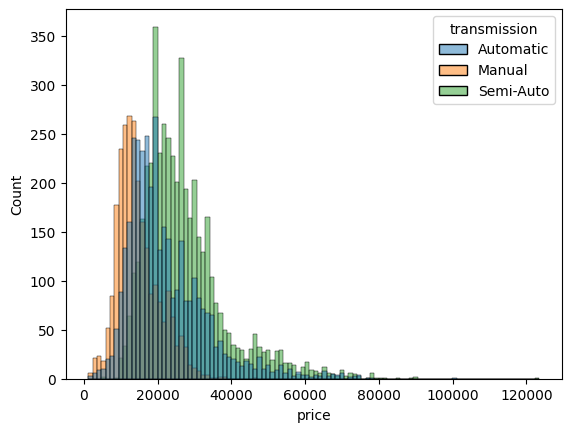

In [9]:
sns.histplot(x='price', data=bmw,hue='transmission')

<Axes: xlabel='price'>

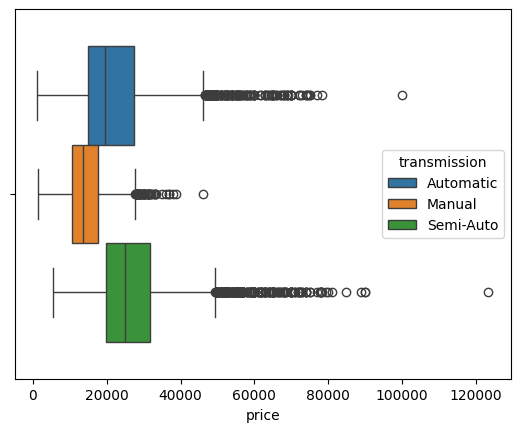

In [7]:
sns.boxplot(x='price', data=bmw,hue='transmission')

In [10]:
### Distribution of Mileage

<Axes: xlabel='mileage', ylabel='Count'>

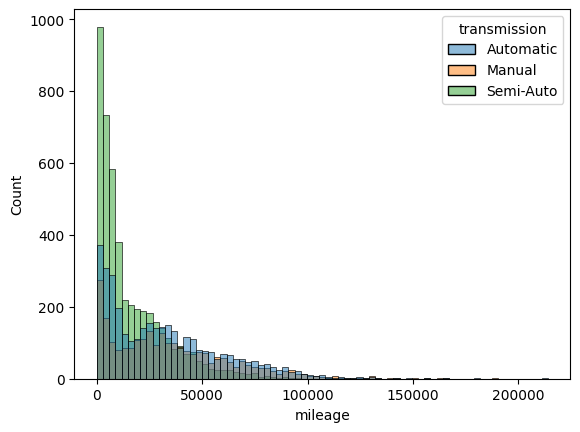

In [12]:
sns.histplot(x='mileage', data=bmw,hue='transmission')

<Axes: xlabel='mileage'>

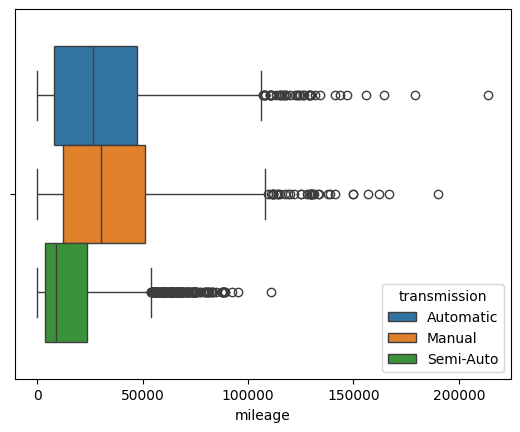

In [14]:
sns.boxplot(x='mileage', data=bmw,hue='transmission')

In [ ]:
### Distribution of MPG (L/100km)

<Axes: xlabel='mpg', ylabel='Count'>

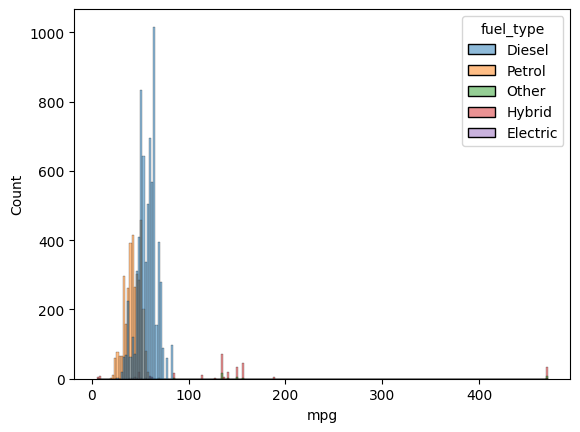

In [18]:
sns.histplot(x='mpg', data=bmw,hue='fuel_type')

<Axes: xlabel='mpg'>

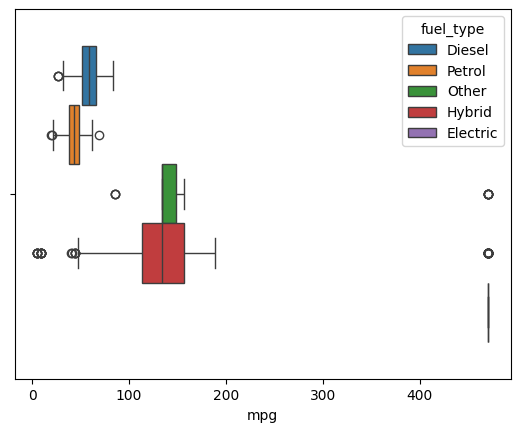

In [19]:
sns.boxplot(x='mpg', data=bmw,hue='fuel_type')

In [20]:
# Compare MGS vs Price

<Axes: xlabel='mpg', ylabel='price'>

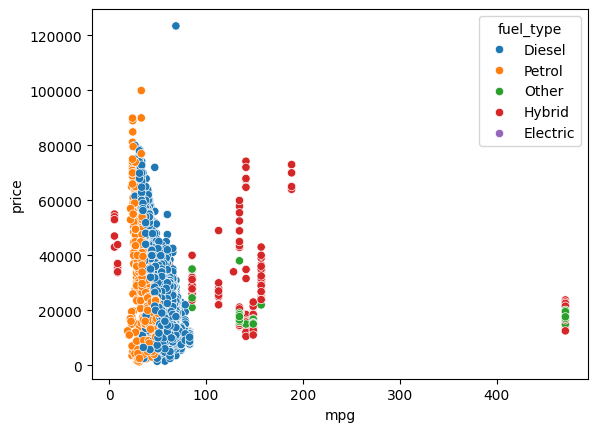

In [23]:
sns.scatterplot(y='price', x='mpg', data=bmw,hue='fuel_type')

<Axes: xlabel='mileage', ylabel='price'>

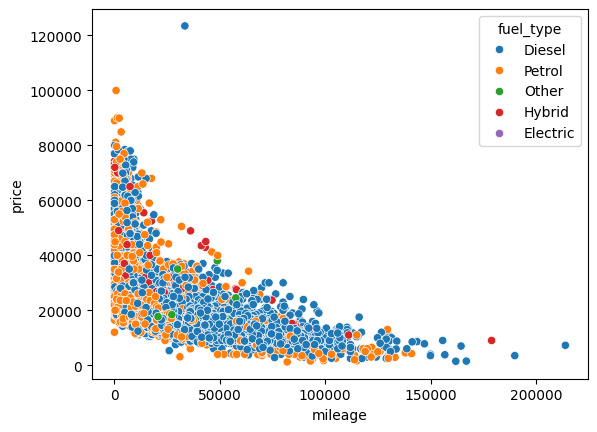

In [24]:
sns.scatterplot(y='price', x='mileage', data=bmw,hue='fuel_type')

<Axes: xlabel='mileage', ylabel='price'>

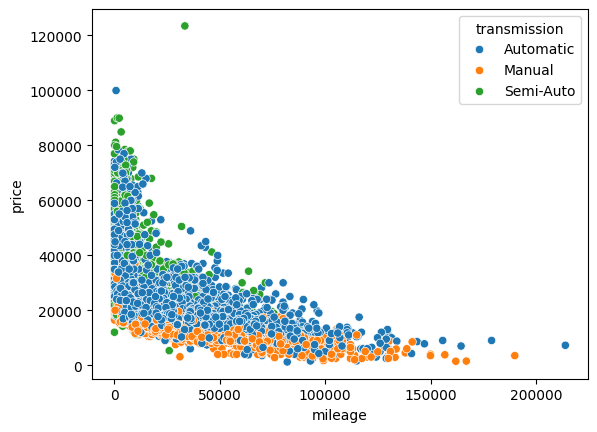

In [25]:
sns.scatterplot(y='price', x='mileage', data=bmw,hue='transmission')

<Axes: xlabel='price', ylabel='year'>

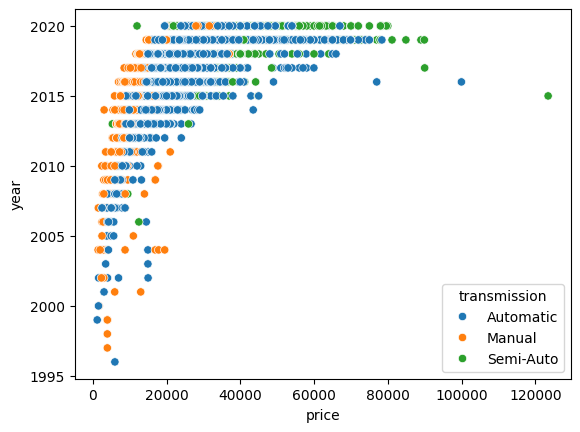

In [27]:
sns.scatterplot(x='price', y='year', data=bmw,hue='transmission')